In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv("education_career_success.csv")

In [6]:
# Display first few rows
display(df.head())

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [8]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64


In [10]:
# Basic statistics
print(df.describe())

               Age  High_School_GPA    SAT_Score  University_Ranking  \
count  5000.000000      5000.000000  5000.000000         5000.000000   
mean     23.442200         2.996978  1253.832000          504.335600   
std       3.473712         0.575673   203.228954          291.060011   
min      18.000000         2.000000   900.000000            1.000000   
25%      20.000000         2.500000  1076.000000          256.000000   
50%      23.000000         2.990000  1257.000000          501.500000   
75%      26.000000         3.500000  1432.000000          759.000000   
max      29.000000         4.000000  1600.000000         1000.000000   

       University_GPA  Internships_Completed  Projects_Completed  \
count     5000.000000            5000.000000         5000.000000   
mean         3.020028               1.982200            4.562800   
std          0.576047               1.408219            2.872927   
min          2.000000               0.000000            0.000000   
25%        

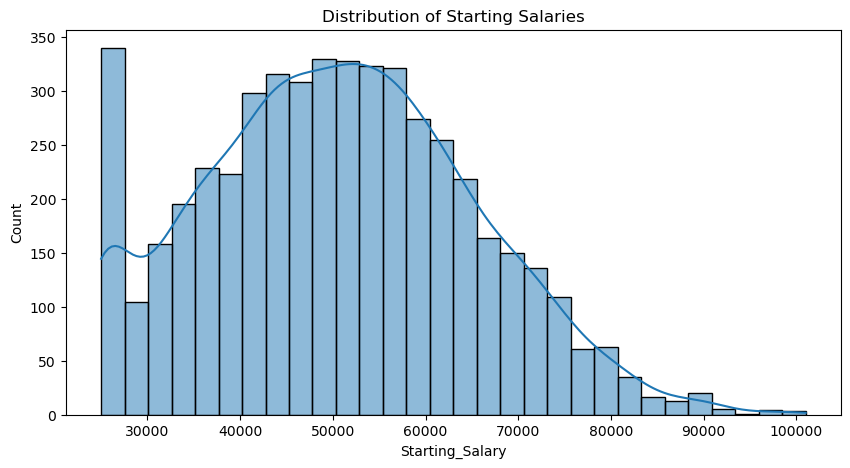

In [12]:
# Data visualization
plt.figure(figsize=(10,5))
sns.histplot(df['Starting_Salary'], bins=30, kde=True)
plt.title("Distribution of Starting Salaries")
plt.show()

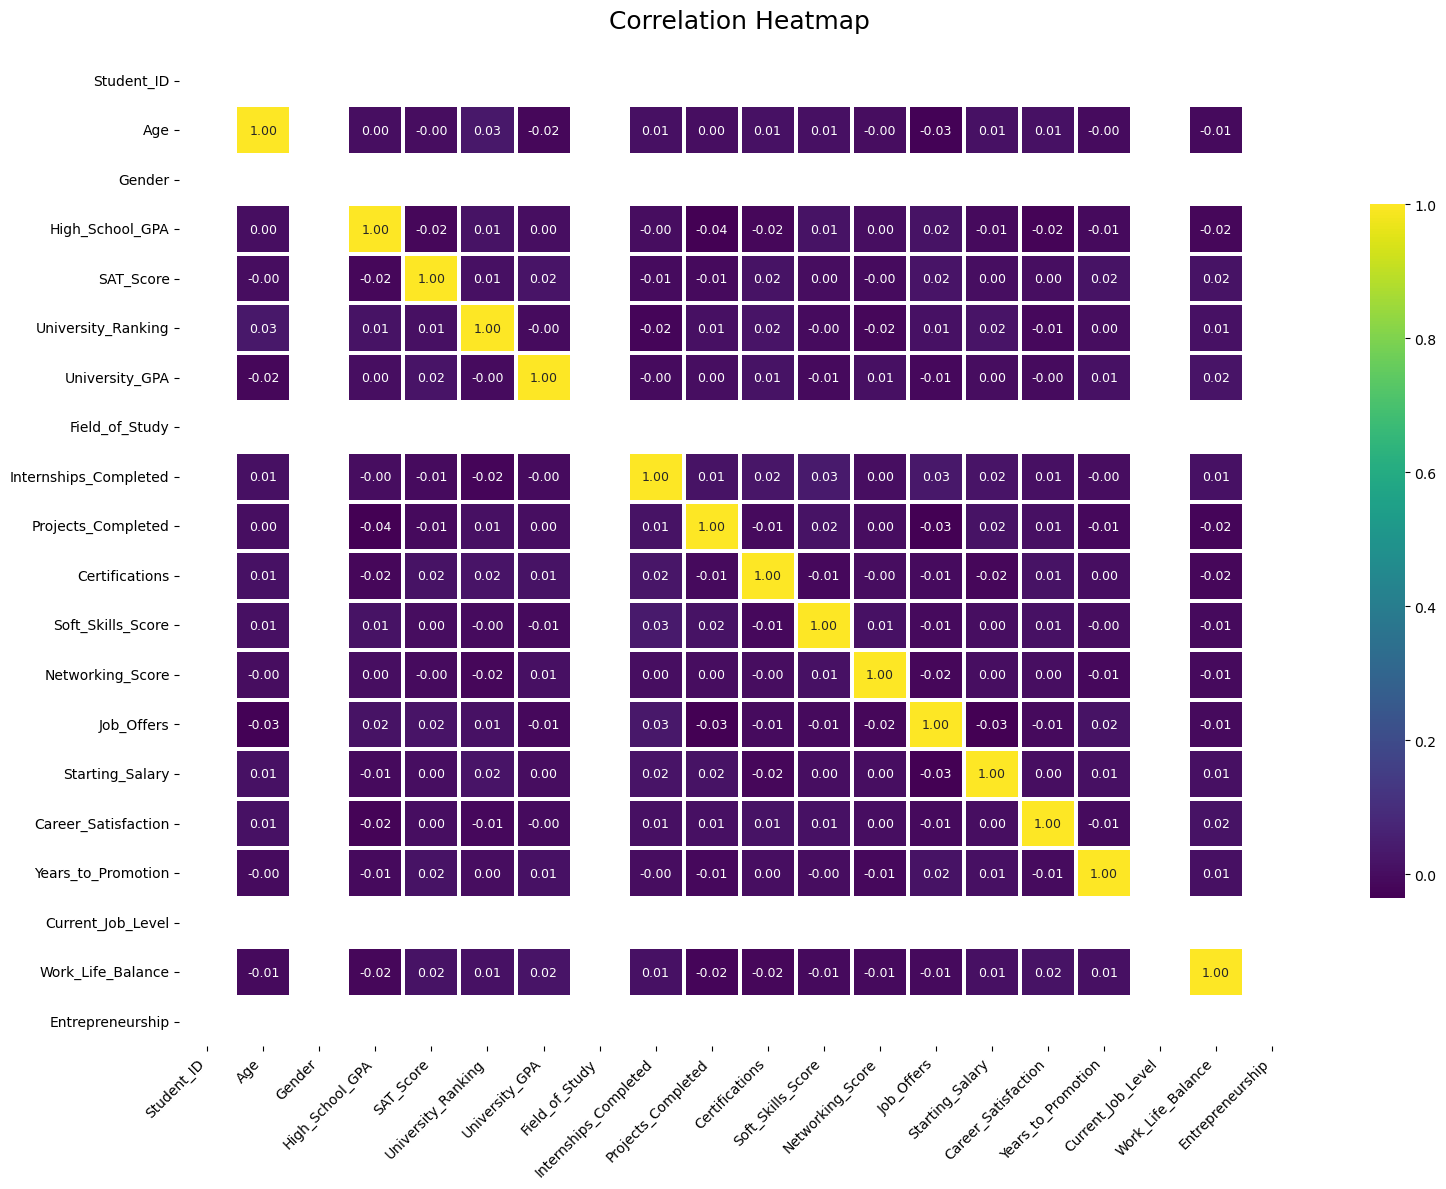

In [18]:
# Convert all columns to numeric where possible
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Set up the plot
plt.figure(figsize=(16, 12))  # Increased size for better spacing

# Create heatmap with improvements
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    fmt=".2f",                 # Limit float to 2 decimal places
    cmap="viridis",            # Smoother and visually pleasing colormap
    linewidths=1.5,            # More visible separation
    linecolor='white',
    annot_kws={"size": 9},     # Tweak font size
    cbar_kws={"shrink": 0.7},  # Shrink color bar for cleaner look
    square=False               # Let heatmap use full figure width/height
)

# Title and layout
plt.title("Correlation Heatmap", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

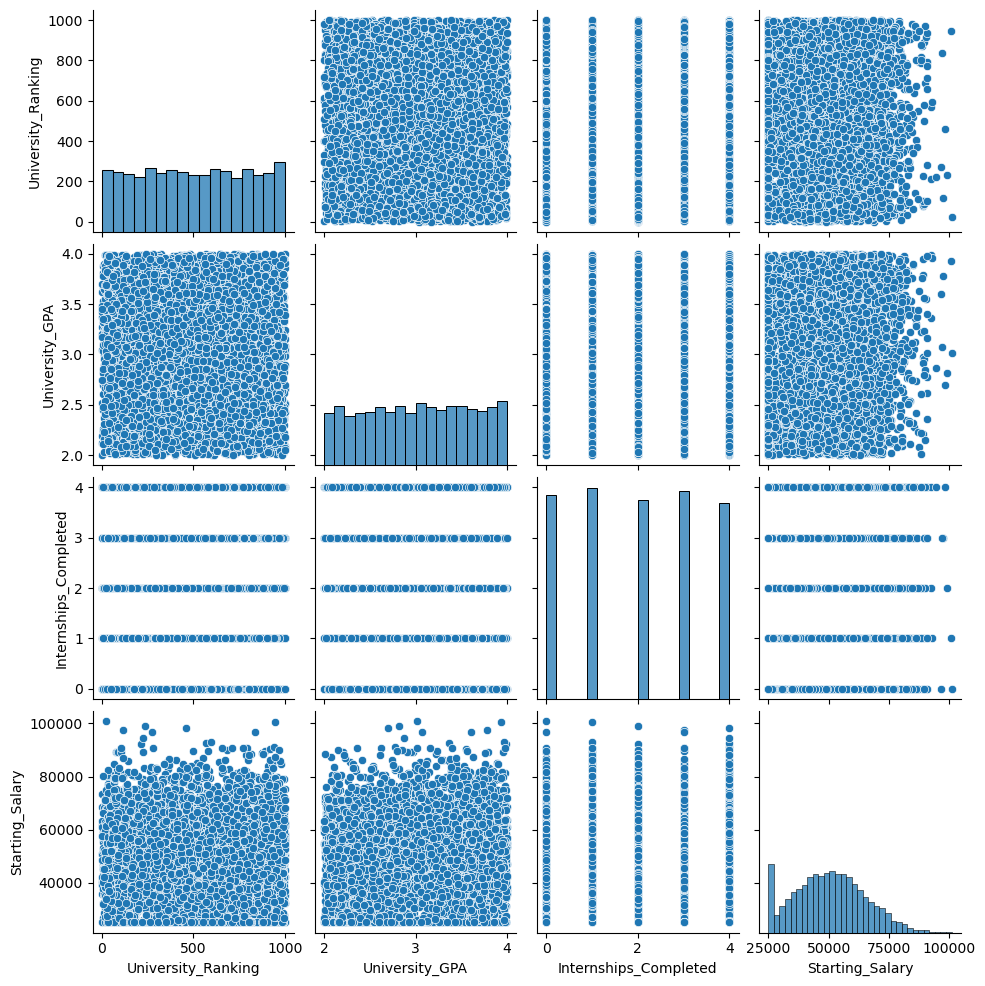

In [20]:
# Pairplot for selected features
sns.pairplot(df[['University_Ranking', 'University_GPA', 'Internships_Completed', 'Starting_Salary']])
plt.show()

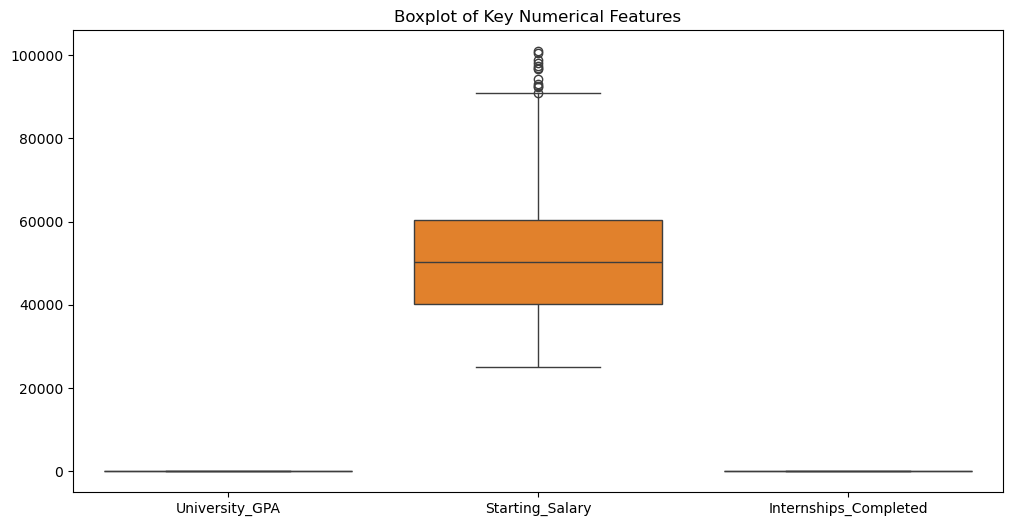

In [22]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['University_GPA', 'Starting_Salary', 'Internships_Completed']])
plt.title("Boxplot of Key Numerical Features")
plt.show()

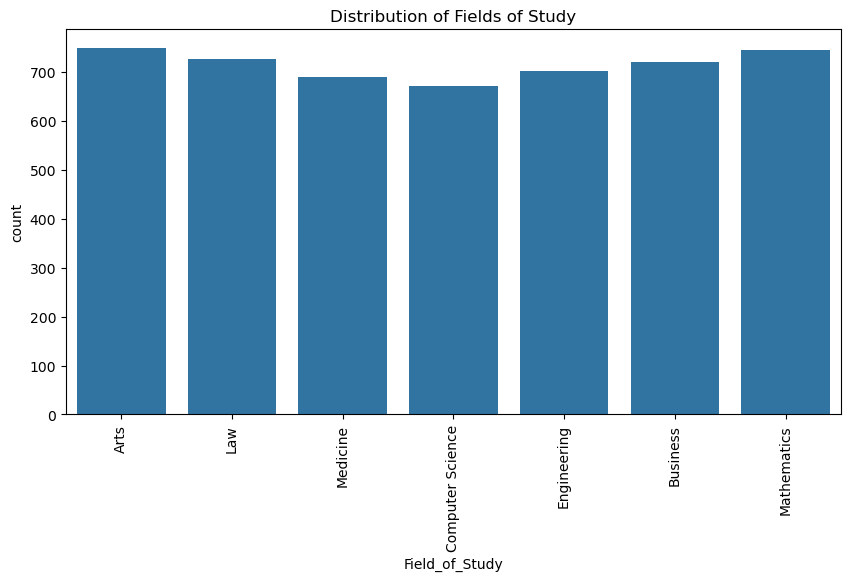

In [24]:
# Countplot of categorical variables
plt.figure(figsize=(10,5))
sns.countplot(x=df['Field_of_Study'])
plt.xticks(rotation=90)
plt.title("Distribution of Fields of Study")
plt.show()

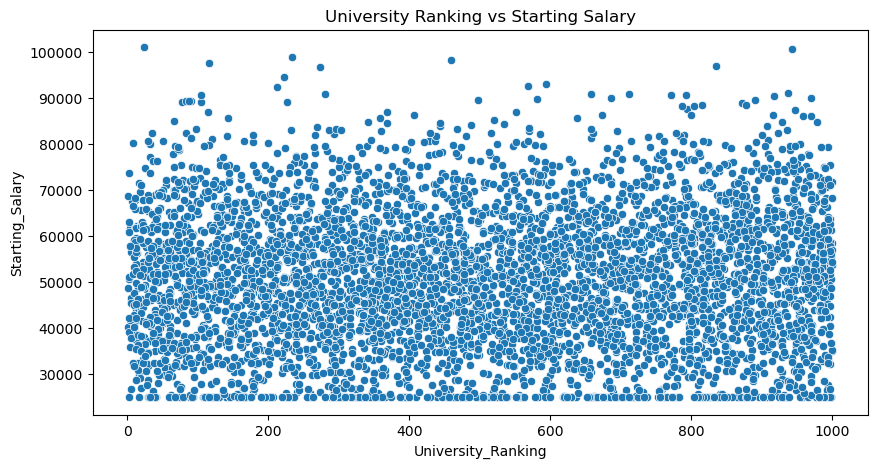

In [26]:
# Relationship between University Ranking and Starting Salary
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['University_Ranking'], y=df['Starting_Salary'])
plt.title("University Ranking vs Starting Salary")
plt.show()

In [28]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Field_of_Study'] = le.fit_transform(df['Field_of_Study'])
df['Current_Job_Level'] = le.fit_transform(df['Current_Job_Level'])
df['Entrepreneurship'] = le.fit_transform(df['Entrepreneurship'])

# Feature selection
features = ['University_Ranking', 'University_GPA', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score']
X = df[features]
y = df['Starting_Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R2 Score: {r2:.2f}\n")

Random Forest Performance:
  Mean Absolute Error: 12182.85
  Mean Squared Error: 225834542.46
  R2 Score: -0.06

Gradient Boosting Performance:
  Mean Absolute Error: 11920.76
  Mean Squared Error: 218358063.94
  R2 Score: -0.03

Linear Regression Performance:
  Mean Absolute Error: 11834.68
  Mean Squared Error: 213131559.48
  R2 Score: -0.00



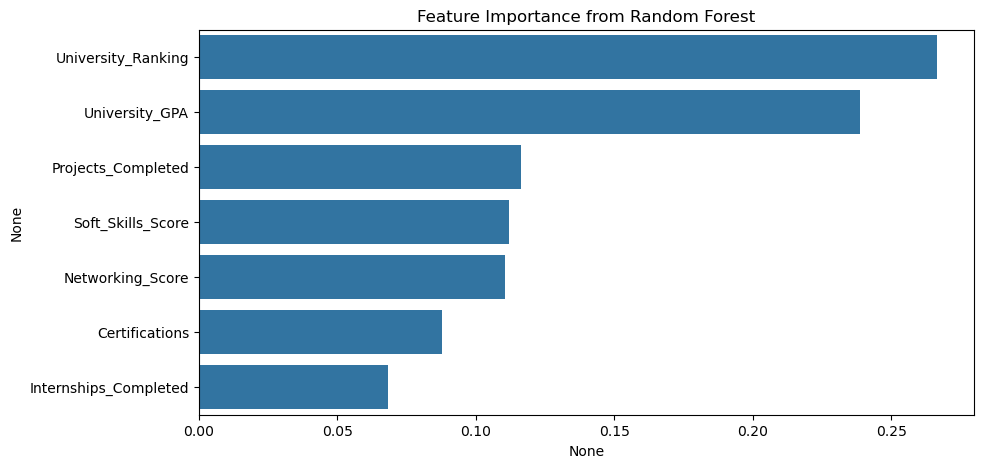

In [32]:
# Feature importance from Random Forest
rf = models["Random Forest"]
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.show()